In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', '079c978071fc4b018cbc369ff9b8fe02')

In [6]:
results = search_images_bing(key, 'amy adams', 'isla fisher')
ims = results.attrgot('contentUrl')
len(ims)



150

In [7]:
ims[50]

'http://celebsla.com/wp-content/uploads/2018/12/amy-adams-attends-vice-world-premiere-in-la-12-11-2018-3.jpg'

In [8]:
dest = 'images/adamsfisher.jpg'
download_url(ims[0], dest)

Path('images/adamsfisher.jpg')

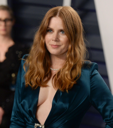

In [9]:
im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
fis_ad = 'isla fisher', 'amy adams'
path = Path('fisheradams')

In [11]:
if not path.exists():
    path.mkdir()
    for o in fis_ad:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} fis_ad')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
fns = get_image_files(path)

In [13]:
fns

(#269) [Path('fisheradams/isla fisher/9abe734f-b58b-420f-aab8-869afde074e2.jpg'),Path('fisheradams/isla fisher/05806de3-ad53-40f9-a952-6b1814ffab82.jpg'),Path('fisheradams/isla fisher/e10ec216-ac56-46df-8124-1fedd4125835.jpg'),Path('fisheradams/isla fisher/42b4f1ec-0cf9-403c-9cd7-022481ca6c8e.jpg'),Path('fisheradams/isla fisher/a2fae0a2-b78c-4497-9199-98ae5a8aacd5.jpg'),Path('fisheradams/isla fisher/0ca104e7-d10d-45cb-b647-f659c83c7914.jpg'),Path('fisheradams/isla fisher/5a5713d0-e07f-464f-87a5-55e55d130e77.jpg'),Path('fisheradams/isla fisher/5635e29a-d1cb-41fc-9b33-ab24080a50ec.jpg'),Path('fisheradams/isla fisher/e2ee6810-e1a2-40de-a8a4-9ae9c4cb6414.jpg'),Path('fisheradams/isla fisher/b434aa8c-fa2c-4188-8630-5aa75322ec43.jpg')...]

In [14]:
failed = verify_images(fns)

In [15]:
failed

(#0) []

In [16]:
failed.map(Path.unlink);

In [17]:
fisherORadams = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [18]:
dls = fisherORadams.dataloaders(path)

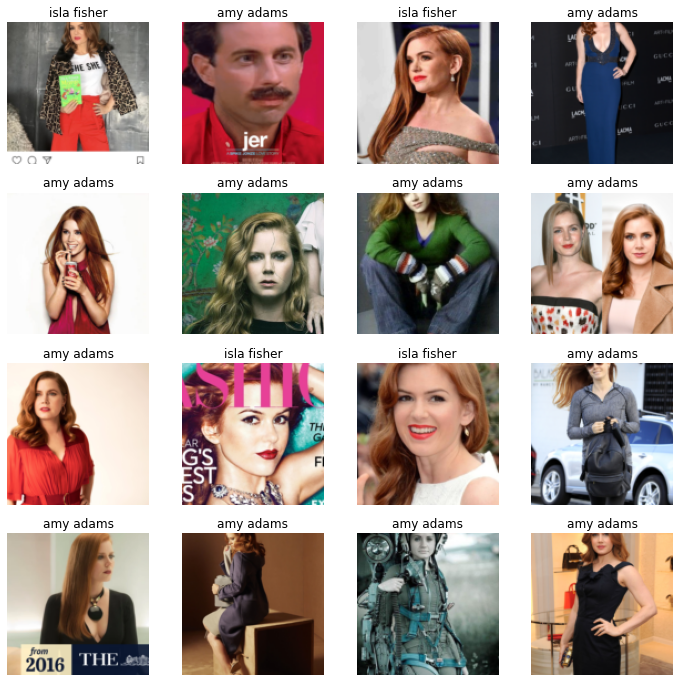

In [19]:
dls.valid.show_batch(max_n=16, nrows=4)

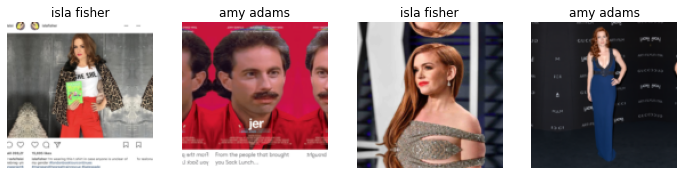

In [20]:
fisherORadams = fisherORadams.new(item_tfms=Resize(128, ResizeMethod.Pad))
dls = fisherORadams.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

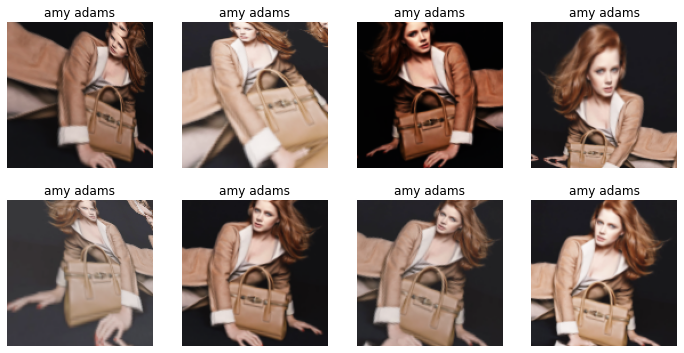

In [21]:
fisherORadams = fisherORadams.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fisherORadams.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
fisherORadams = fisherORadams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fisherORadams.dataloaders(path)

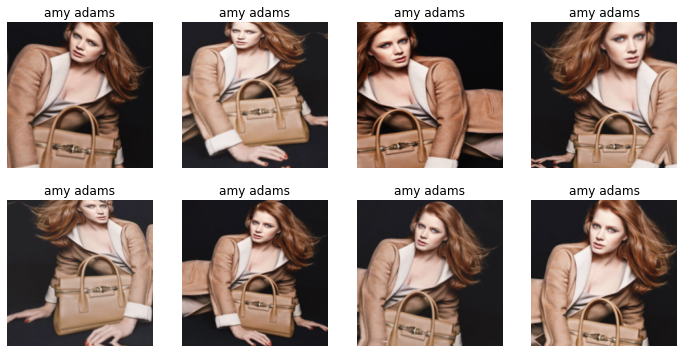

In [23]:
dls.show_batch(max_n=8, nrows=2, unique=True)

In [70]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.376135,0.966424,0.339623,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.018136,0.774253,0.264151,00:05
1,0.943862,0.684239,0.264151,00:05
2,0.814111,0.699748,0.283019,00:05
3,0.715987,0.657071,0.169811,00:05
4,0.658370,0.651735,0.226415,00:05
5,0.580376,0.634504,0.188679,00:05
6,0.517035,0.637869,0.169811,00:05
7,0.446339,0.676268,0.207547,00:05
8,0.398060,0.695591,0.188679,00:05
9,0.363166,0.708805,0.169811,00:05


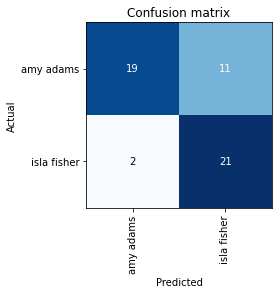

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

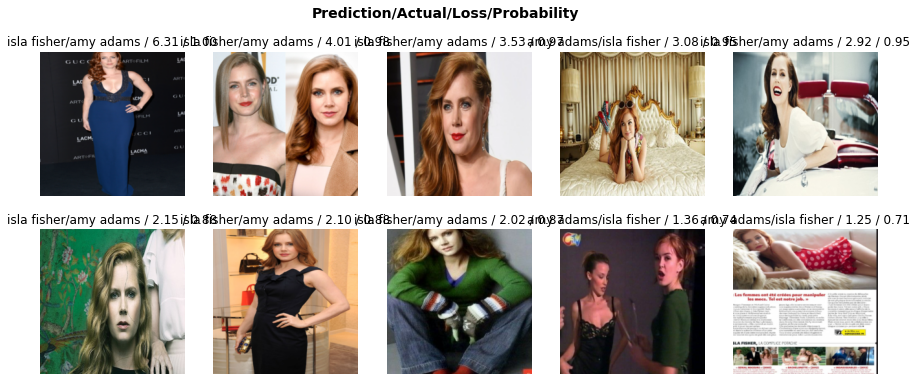

In [26]:
interp.plot_top_losses(10, nrows=2)

In [27]:
cleaner = ImageClassifierCleaner(learn)

In [28]:
cleaner

In [29]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [41]:
learn.export()

In [42]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [49]:
learn_inf = load_learner(path/'export.pkl')

In [43]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [45]:
img = PILImage.create(btn_upload.data[-1])
                                    

In [46]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [50]:
pred,pred_idx,probs = learn_inf.predict(img)

In [51]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: isla fisher; Probability: 0.9765')

In [52]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [56]:
btn_upload = widgets.FileUpload()


In [71]:
VBox([widgets.Label('Select your favorite oft-confused redheaded movie star!'),
                    btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextention enable --sys-prefix voila

In [43]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')